In [2]:
import warnings
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
warnings.filterwarnings('ignore')

In [3]:
# load the model
with open('./data/logreg_supervised_classification.pickle', 'rb') as f:
    logreg = pickle.load(f)

In [4]:
PIECES_NAMES = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen', 'King']

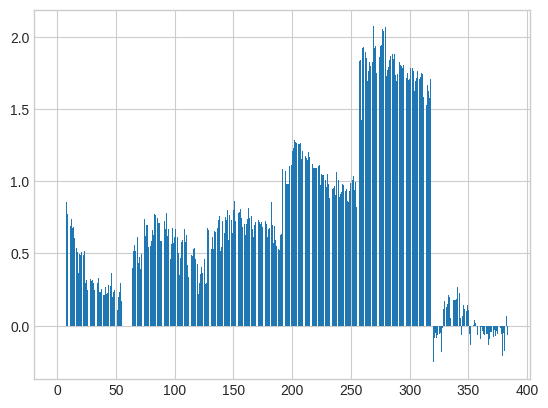

In [5]:
# display coefficients of logistic regression
coefficients = np.array(logreg.coef_[0])
plt.bar(range(len(coefficients)), coefficients)
plt.show()

In [6]:
# get pieces values
# reshape coefficients to 2D array
avg_coefficients = coefficients.reshape(6, 8, 8)

# make average of all coefficients for each piece on possible squares
pieces_values = []
for i, piece_name in enumerate(PIECES_NAMES):
    coeff_array = avg_coefficients[i]
    if piece_name == 'Pawn':
        coeff_array = coeff_array[1 : 7]
    pieces_values.append(coeff_array.mean())
    

# normalize values to pawns at homerank
pawn_value = avg_coefficients[0][6].mean()
pieces_values = [value / pawn_value for value in pieces_values]

for piece_name, pieces_value in zip(PIECES_NAMES, pieces_values):
    print(piece_name, pieces_value)

Pawn 1.8173036649646899
Knight 2.6864901869319335
Bishop 3.35784173507269
Rook 5.169587899821101
Queen 8.740611294151464
King 3.971044761139081e-15


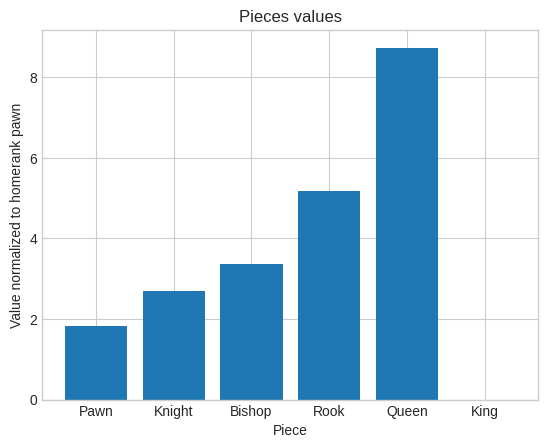

In [7]:
# plot graph of pieces values
plt.bar(range(len(pieces_values)), pieces_values)
plt.title('Pieces values')
plt.ylabel('Value normalized to homerank pawn')
plt.xlabel('Piece')
plt.xticks(range(len(pieces_values)), PIECES_NAMES)
plt.show()

In [8]:
normalized_coefficients = avg_coefficients / pawn_value

In [9]:
def display_2d_array_as_heatmap(array, title):
    """displays 2d array as heatmap"""
    # round array
    array = np.round(array, 1)
    fig, ax = plt.subplots()
    im = ax.imshow(array)
    
    # set x and y ticks to chess coordinates
    x_labels = [chr(ord('A') + i) for i in range(len(array[0]))]
    y_labels = [str(i + 1) for i in reversed(range(len(array)))]
    ax.set_xticks(np.arange(len(array[0])))
    ax.set_yticks(np.arange(len(array)))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    
    # rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # add value annotations to each cell
    for i in range(len(array)):
        for j in range(len(array[0])):
            text = ax.text(j, i, array[i, j], ha="center", va="center", color="w")
    
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [10]:
# unuse seaborn style
plt.style.use('default')

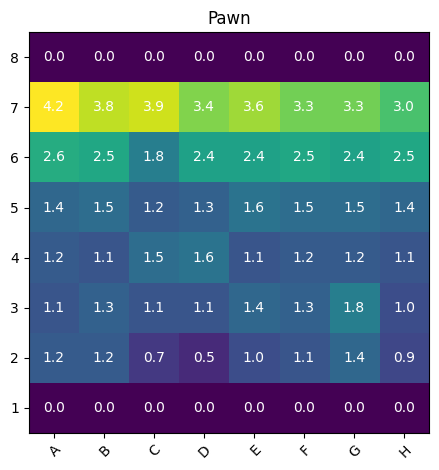

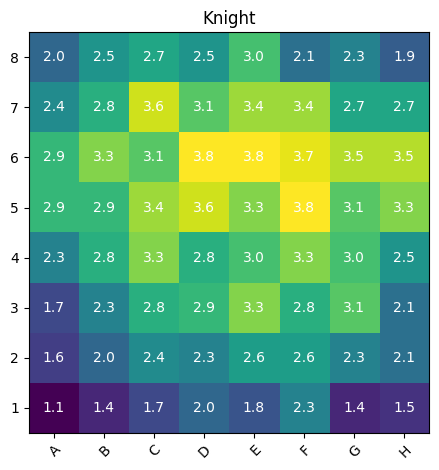

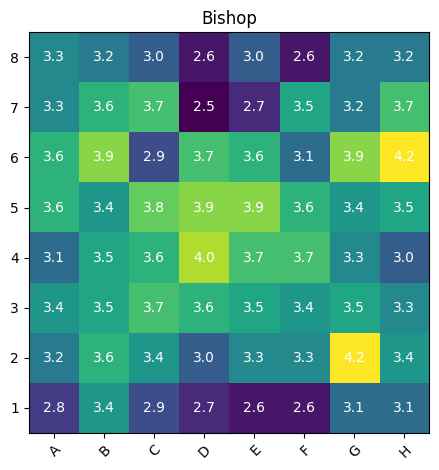

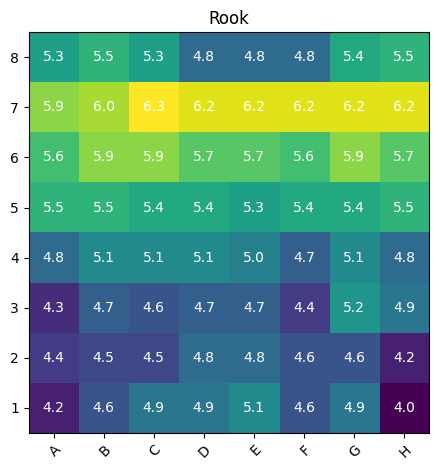

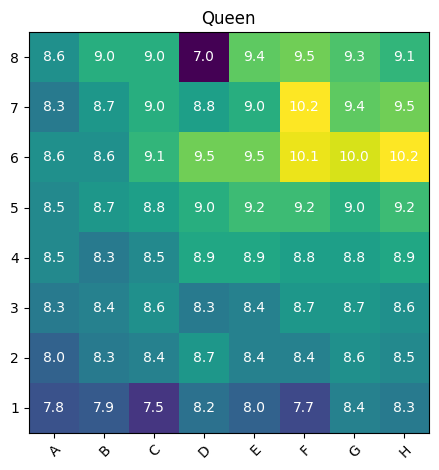

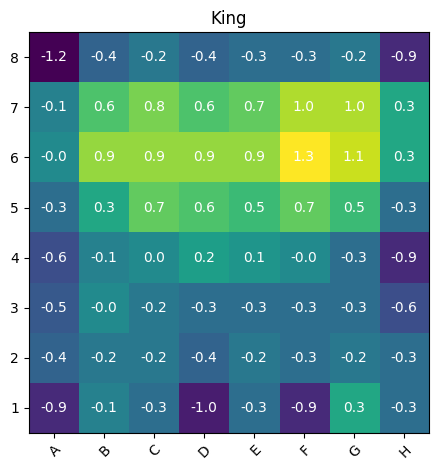

In [11]:
# display coefficients as heatmap
for i, piece_name in enumerate(PIECES_NAMES):
    display_2d_array_as_heatmap(normalized_coefficients[i], piece_name)